In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
import statsmodels.api as sm

In [65]:
import missingno as msno

In [5]:
diabetes_data = pd.read_csv('pima_indians_diabetes.csv')

In [66]:
diabetes_data.shape

(768, 17)

In [7]:
diabetes_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Find the index upto which there are contiguous missing values for all the features
def check_missing_all(feature_row):
    #Feature row is a series
    #Chek whether all the columns have missing values
    if(feature_row.isna().sum() == len(feature_row)):
        return True
    
    return False

In [9]:
x_ind = [ind for ind in diabetes_data.index.tolist() if(not check_missing_all(diabetes_data.iloc[ind, :]))]


In [10]:
#The first index containin data
x_ind[0]

7

In [11]:
#Remove the first 7 indices
diabetes_data = diabetes_data.iloc[7:, :]

In [12]:
diabetes_data.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8']

In [13]:
diabetes_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
7,Number of times pregnant,Plasma glucose concentration a 2 hours in an o...,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
8,6,148,72,35,0,33.6,0.627,50,1
9,1,85,66,29,0,26.6,0.351,31,0
10,8,183,64,0,0,23.3,0.672,32,1
11,1,89,66,23,94,28.1,0.167,21,0


In [14]:
diabetes_data = diabetes_data.reset_index()
diabetes_data.head()

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,7,Number of times pregnant,Plasma glucose concentration a 2 hours in an o...,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
1,8,6,148,72,35,0,33.6,0.627,50,1
2,9,1,85,66,29,0,26.6,0.351,31,0
3,10,8,183,64,0,0,23.3,0.672,32,1
4,11,1,89,66,23,94,28.1,0.167,21,0


In [15]:
if('index' in diabetes_data.columns):
    diabetes_data = diabetes_data.drop('index', axis = 1)

In [16]:
diabetes_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Number of times pregnant,Plasma glucose concentration a 2 hours in an o...,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [17]:
#Set the column names as the first row in the data
diabetes_data.columns = list(diabetes_data.iloc[0, :])
diabetes_data.head()

#Drop the first row
diabetes_data = diabetes_data.drop(0, axis = 0)

diabetes_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [18]:
diabetes_data.columns[-1]

'9. Class variable (0 or 1) '

In [19]:
#Rename the target column
diabetes_data.rename(columns = {"9. Class variable (0 or 1) ":"Target Class"},\
                     inplace = True)

diabetes_data.columns[-1]

'Target Class'

In [20]:
diabetes_data = diabetes_data.reset_index()

In [21]:
if('index' in diabetes_data.columns):
    diabetes_data = diabetes_data.drop('index', axis = 1)
'index' in diabetes_data.columns

False

### Missing Value Analysis

In [22]:
def find_missing(data):
    features = data.columns.tolist()
    missing_values_count = data.isna().sum()
    missing_values_percentage = missing_values_count*100/(data.shape[0])
    
    missing_data = pd.DataFrame({'Features': features,\
                                 'Missing Value Count': missing_values_count,\
                                 'Missing Values Percentage': missing_values_percentage},
                               columns = ['Features',\
                                         'Missing Value Count',\
                                         'Missing Values Percentage'])
    
    missing_data = missing_data.sort_values(by = 'Missing Value Count',\
                                           ascending = False)
    missing_data = missing_data.set_index('Features')
    return missing_data

In [23]:
find_missing(diabetes_data).head()


,Missing Value Count,Missing Values Percentage
Features,,
Number of times pregnant,0,0.0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0,0.0
Diastolic blood pressure (mm Hg),0,0.0
Triceps skin fold thickness (mm),0,0.0
2-Hour serum insulin (mu U/ml),0,0.0


In [24]:
diabetes_data.dtypes

Number of times pregnant                                                    object
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    object
Diastolic blood pressure (mm Hg)                                            object
Triceps skin fold thickness (mm)                                            object
2-Hour serum insulin (mu U/ml)                                              object
Body mass index (weight in kg/(height in m)^2)                              object
Diabetes pedigree function                                                  object
Age (Years)                                                                 object
Target Class                                                                object
dtype: object

In [25]:
#Information about the variables
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                                    768 non-null object
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null object
Diastolic blood pressure (mm Hg)                                            768 non-null object
Triceps skin fold thickness (mm)                                            768 non-null object
2-Hour serum insulin (mu U/ml)                                              768 non-null object
Body mass index (weight in kg/(height in m)^2)                              768 non-null object
Diabetes pedigree function                                                  768 non-null object
Age (Years)                                                                 768 non-null object
Target Class                                                                768 non-null object
dtypes: object(9)
memory usage: 

### Rename Columns

In [30]:
rename_map = {'Plasma glucose concentration a 2 hours in an oral glucose tolerance test':\
              'Plasma glucose concentration',\
              'Body mass index (weight in kg/(height in m)^2)': 'BMI'}
diabetes_data = diabetes_data.rename(
                              columns = rename_map)

### Change the Columns to relevant Data Types

In [32]:
columns = list(diabetes_data.keys())
data_types_map = dict()
for col_key in columns:
    if((col_key=='BMI')\
       or (col_key == 'Diabetes pedigree function')):
        data_types_map[col_key] = float
    else:
        data_types_map[col_key] = int
data_types_map

{'Number of times pregnant': int,
 'Plasma glucose concentration': int,
 'Diastolic blood pressure (mm Hg)': int,
 'Triceps skin fold thickness (mm)': int,
 '2-Hour serum insulin (mu U/ml)': int,
 'BMI': float,
 'Diabetes pedigree function': float,
 'Age (Years)': int,
 'Target Class': int}

In [33]:
#Apply the data type map to the data frame
diabetes_data = diabetes_data.astype(data_types_map)

In [34]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant            768 non-null int64
Plasma glucose concentration        768 non-null int64
Diastolic blood pressure (mm Hg)    768 non-null int64
Triceps skin fold thickness (mm)    768 non-null int64
2-Hour serum insulin (mu U/ml)      768 non-null int64
BMI                                 768 non-null float64
Diabetes pedigree function          768 non-null float64
Age (Years)                         768 non-null int64
Target Class                        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
diabetes_data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),BMI,Diabetes pedigree function,Age (Years),Target Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:

#list(map(lambda x: (, ), \
list(map(lambda x: (min(diabetes_data[x]), max(diabetes_data[x])),\
         ['Triceps skin fold thickness (mm)', 'Diastolic blood pressure (mm Hg)',\
         'BMI']))

[(0, 99), (0, 122), (0.0, 67.1)]

### The 3 measures below cannot have a 0 value
#### BMI
#### Triceps skin fold thickness 
#### Diastolic blood pressure

Replace the 0's with missing value

In [37]:
for col in ['Triceps skin fold thickness (mm)', 'Diastolic blood pressure (mm Hg)',\
         'BMI']:
    diabetes_data.loc[diabetes_data[col]==0.0, col] = np.nan

In [38]:
#Check the info
diabetes_data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),BMI,Diabetes pedigree function,Age (Years),Target Class
count,768.000000,768.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
diabetes_data.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)', 'BMI', 'Diabetes pedigree function',
       'Age (Years)', 'Target Class'],
      dtype='object')

In [40]:
def plotting(plot_type = None, feature = None,\
             data = diabetes_data, x = None, y = None):
    #If the two axis are specifically mentioned
    if((x and y) and (type(x) == list and type(y) == list)):
        plt.plot(x, y)
        plt.ylabel(feature)
        plt.xlabel("Indices")
    elif(plot_type == 'Histogram'):
        plt.hist(data[feature])
        plt.title(feature)
        
    elif(plot_type == 'Box Plot'):
        plt.boxplot(data[feature])
    elif(plot_type == 'Box Plot w.r.t. Target'):
        if(feature in data.columns):
            sbn.boxplot('Target Class', feature, data = data)
    plt.show()

In [41]:
find_missing(diabetes_data)

,Missing Value Count,Missing Values Percentage
Features,,
Triceps skin fold thickness (mm),227,29.557292
Diastolic blood pressure (mm Hg),35,4.557292
BMI,11,1.432292
Number of times pregnant,0,0.000000
Plasma glucose concentration,0,0.000000
2-Hour serum insulin (mu U/ml),0,0.000000
Diabetes pedigree function,0,0.000000
Age (Years),0,0.000000
Target Class,0,0.000000


In [42]:
def check_distribution(col):
    data = diabetes_data.loc[diabetes_data[col].isna()==False, col]
    plt.hist(data)
    plt.title(col)
    plt.show()

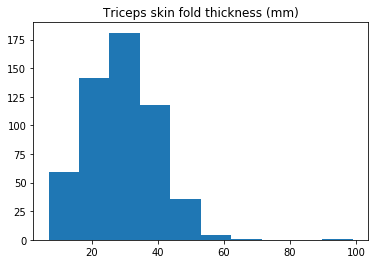

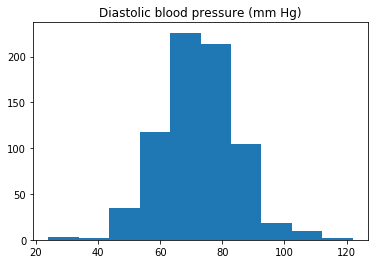

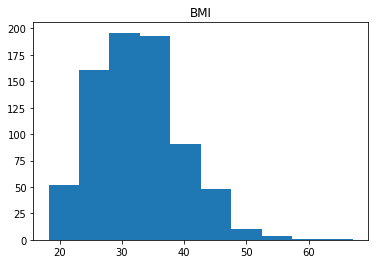

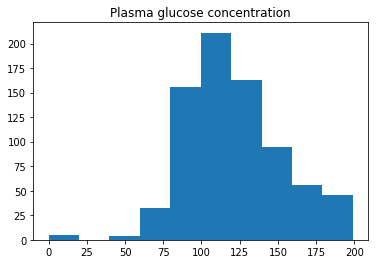

[None, None, None, None]

In [43]:
col_missing = ['Triceps skin fold thickness (mm)',\
               'Diastolic blood pressure (mm Hg)',\
               'BMI',
                'Plasma glucose concentration']
list(map(check_distribution, col_missing))

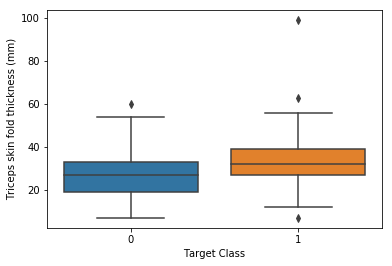

In [44]:
sbn.boxplot('Target Class', 'Triceps skin fold thickness (mm)', data = diabetes_data)

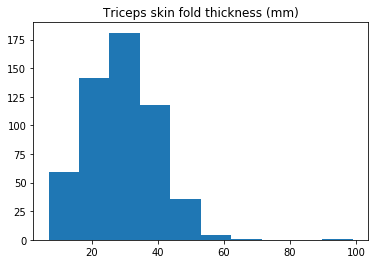

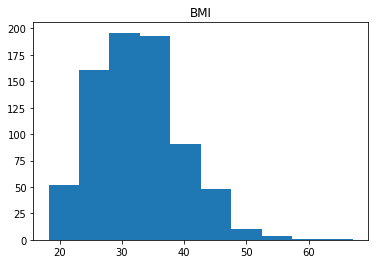

[None, None]

In [45]:
'''
Both BMI and Triceps skin fold thickness are right skewed
Applying log transformation
'''
list(map(check_distribution, ['Triceps skin fold thickness (mm)', 'BMI', ]))

[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

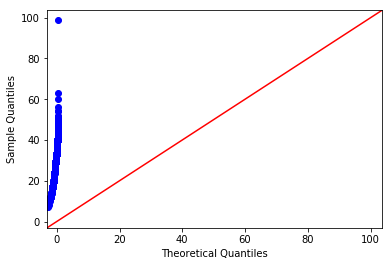

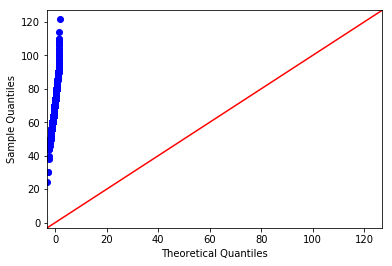

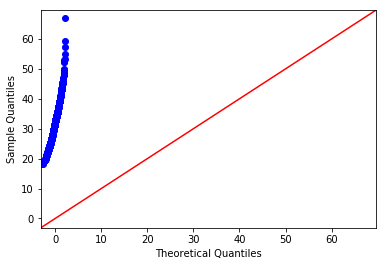

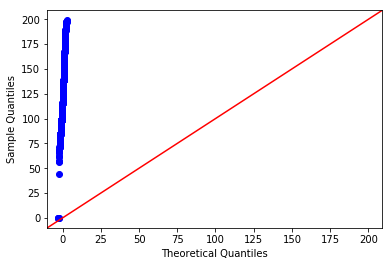

In [46]:
list(map(lambda x: sm.qqplot((diabetes_data[x]), line='45'), col_missing))

In [47]:
find_missing(diabetes_data[col_missing])

,Missing Value Count,Missing Values Percentage
Features,,
Triceps skin fold thickness (mm),227,29.557292
Diastolic blood pressure (mm Hg),35,4.557292
BMI,11,1.432292
Plasma glucose concentration,0,0.000000


### Missing Value Imputation

In [48]:
#Create new columns with imputed values for mean
def impute(col_name, method=None):
    if(method == 'mean'):
        values = diabetes_data.loc[diabetes_data[col_name].isnull() == False,\
                                   col_name].tolist()
        mean_value = np.mean(values)
        values = list(map(lambda x: mean_value if(np.isnan(x)) else x,\
                         diabetes_data[col_name].tolist()))
        
        diabetes_data[col_name + ' imputed'] = values 

In [49]:
##Since the variables follow a near to normal distribution
[impute(col, 'mean') for col in col_missing]

[None, None, None, None]

In [50]:
imputed_cols = [col + " imputed" for col in col_missing]
find_missing(diabetes_data[imputed_cols])

,Missing Value Count,Missing Values Percentage
Features,,
Triceps skin fold thickness (mm) imputed,0,0.0
Diastolic blood pressure (mm Hg) imputed,0,0.0
BMI imputed,0,0.0
Plasma glucose concentration imputed,0,0.0


In [51]:
#Check normality of the columns containing missing values
#Standardize the data
def standardize(var_values):
    #Obtain the standard deviation
    mean_x = np.mean(var_values)
    std_dev = np.sqrt(np.sum([(x_i - mean_x)**2 for x_i in var_values])\
    / len(var_values))
    
    #Standardize
    var_values = [(x_i - mean_x)/std_dev for x_i in var_values]

    return np.array(var_values)

standardized_cols = list(map(lambda x: standardize(diabetes_data[x + " imputed"]), \
                             col_missing))

list(map(lambda x:x[:10], \
         standardized_cols))
# list(map(lambda x: sm.qqplot(x[:10], line='45'), \
#          standardized_cols))

[array([ 6.65502121e-01, -1.74633816e-02,  5.66155539e-15, -7.00428884e-01,
         6.65502121e-01,  5.66155539e-15,  3.24019370e-01,  5.66155539e-15,
         1.80377796e+00,  5.66155539e-15]),
 array([-3.35182392e-02, -5.29859033e-01, -6.95305964e-01, -5.29859033e-01,
        -2.68066914e+00,  1.31928692e-01, -1.85343448e+00, -2.35114230e-15,
        -1.98965170e-01,  1.95184494e+00]),
 array([ 1.66291742e-01, -8.52531177e-01, -1.33283341e+00, -6.34211980e-01,
         1.54897999e+00, -9.98077308e-01, -2.12128199e-01,  4.13720166e-01,
        -2.84901265e-01,  2.06833493e-15]),
 array([ 0.84832379, -1.12339636,  1.94372388, -0.99820778,  0.5040552 ,
        -0.15318486, -1.34247638, -0.184482  ,  2.38188392,  0.12848945])]

### Check the distribution of imputed columns

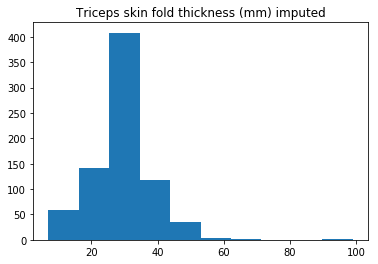

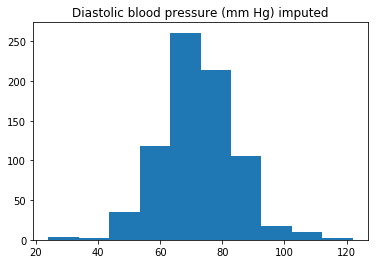

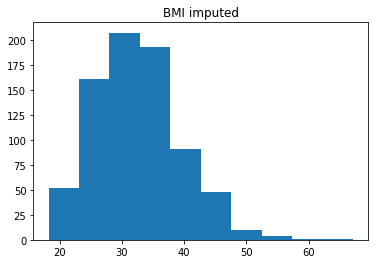

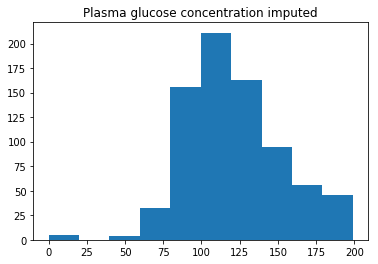

[None, None, None, None]

In [52]:

list(map(check_distribution, imputed_cols))

### Plotting Diabetes(Target Class) V/S BMI

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <a list of 10 Patch objects>)

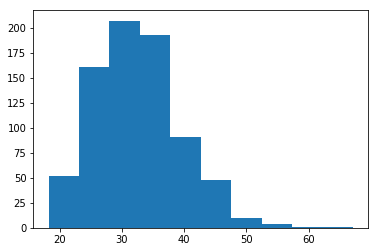

In [53]:
plt.hist(list(diabetes_data['BMI' + " imputed"]))

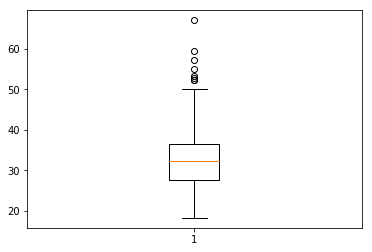

In [54]:
#Use the imputed columns
plotting('Box Plot', 'BMI imputed')

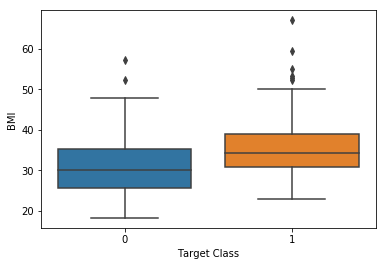

In [55]:
sbn.boxplot('Target Class', 'BMI', data = diabetes_data)

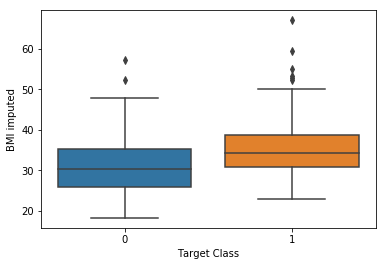

In [56]:
sbn.boxplot('Target Class', 'BMI imputed', data = diabetes_data)

## Square Root Transformation

In [57]:
##Include the columns having the square root transformation
for col in imputed_cols:
    diabetes_data[col + "SQR Root"] = np.sqrt(diabetes_data[col])

In [58]:
SQR_root_cols = [col for col in diabetes_data.columns if(col.endswith("SQR Root"))]
SQR_root_cols

['Triceps skin fold thickness (mm) imputedSQR Root',
 'Diastolic blood pressure (mm Hg) imputedSQR Root',
 'BMI imputedSQR Root',
 'Plasma glucose concentration imputedSQR Root']

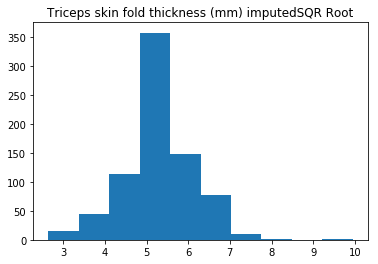

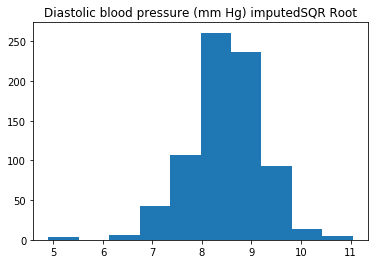

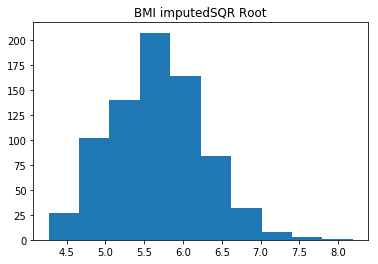

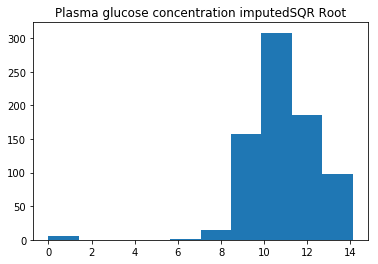

[None, None, None, None]

In [59]:
list(map(lambda col: plotting('Histogram', col), SQR_root_cols))

## Correlation Analysis


In [60]:
def correlation_check(data):
    data_corr = data.corr()
    sbn.heatmap(data_corr,\
                cmap = "YlGnBu",\
                annot = True)
    

In [61]:
independent_vars = list(set(diabetes_data.columns).difference(set(['Target Class'])))
independent_vars

['Number of times pregnant',
 '2-Hour serum insulin (mu U/ml)',
 'Diabetes pedigree function',
 'Triceps skin fold thickness (mm) imputedSQR Root',
 'Plasma glucose concentration imputedSQR Root',
 'BMI',
 'Diastolic blood pressure (mm Hg)',
 'Plasma glucose concentration',
 'Age (Years)',
 'Diastolic blood pressure (mm Hg) imputedSQR Root',
 'Diastolic blood pressure (mm Hg) imputed',
 'BMI imputedSQR Root',
 'Plasma glucose concentration imputed',
 'BMI imputed',
 'Triceps skin fold thickness (mm)',
 'Triceps skin fold thickness (mm) imputed']

In [62]:
len(independent_vars)

16

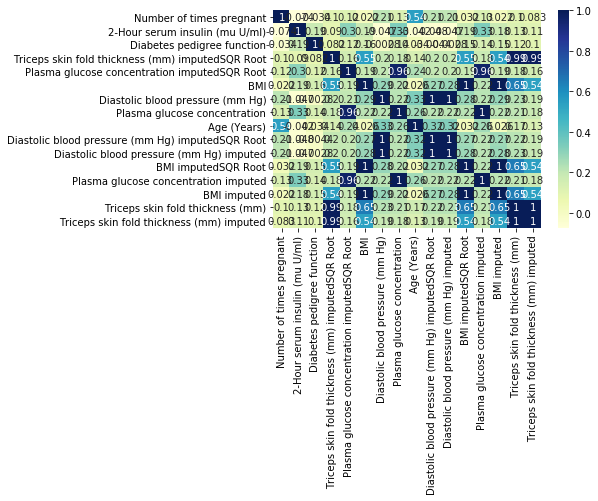

In [67]:
correlation_check(diabetes_data[independent_vars])

## Outlier Analysis

In [68]:
def outlier_analysis(data, feature):
    #Plot the box_plot
    #plotting(data[feature], 'Box Plot')
    plotting('Box Plot w.r.t. Target', feature, data)
    
    #IQR
    q25, q75 = np.percentile(data[feature], [25, 75])
    IQR = q75 - q25
    
    #Get the outliers
    lower_bound, upper_bound = q25 - (1.5 * IQR), q75 + (1.5 * IQR)
    lower_outliers = data.loc[data[feature]<=lower_bound, feature]
    upper_outliers = data.loc[data[feature]>=upper_bound, feature]
    
    #print("Lower Outlier:- {}" .format(lower_outliers))
    #print("Upper Outliers:- {}" .format(upper_outliers))
    

## Logistic Regression

### Assumptions:- 

##### The log odds ratio is a linear relationship of independent variable
##### There does not exist any multicollinearity amongst independent variables
##### Target variable consists of only two classes (Dependent Variable must be Binary)
##### Sample size must be large

In [198]:
def get_numpy_data(data, features, target=None):
    #Add a constant feature
    data['Constant'] = 1
    features = ['Constant'] + features
    
    feature_matrix = np.array(data[features])
    
    if(target):
        target_class = np.array(data[target])
    
        return (feature_matrix, target_class)
    else:
        return (feature_matrix)

In [70]:
def compute_probability(weights, feature_matrix):
    score = np.dot(feature_matrix, weights)
    
    probability = ((1 + np.e**((-1) * score)) ** -1)
    
    return probability

In [71]:
def get_derivative(error, feature):
    return np.dot(feature, error)

In [72]:
def get_prediction_class(probability, threshold):
    result = (probability >= threshold)
    
    return list(map(lambda x: +1 if(x) else 0, result))

In [73]:
print(np.log(np.e ** 10))

10.0


In [74]:
def log_likelihood(indicator, feature_matrix, coefficients):
    #Calculate score
    score = np.dot(feature_matrix, coefficients)
    
    #Calculate likelihood
    log_likelihood = np.sum(score * (indicator - 1) - np.log(1 + np.e**(score)))
    
    return (log_likelihood)

In [105]:
def gradient_assent(coefficients, feature_matrix, j,\
                   indicator, step_size):
    #Get Probability of Prediction
    probability = compute_probability(coefficients, feature_matrix)
            
    #Calculate Error
    error = (indicator - probability)
    
    #Compute Derivative
    derivative = get_derivative(error, feature_matrix[:, j])
                
    #Update the weights
    coefficients[j] += (step_size*derivative)    
    
    return(derivative, coefficients[j])

In [131]:
def append_data_frame(coefficients_store, derivatives_store, features):
   
    #Reshape the coeff
    coefficients_store, derivatives_store = list(map(np.array,\
                                                [coefficients_store,\
                                                 derivatives_store]))
    coefficients_store, derivatives_store = list(map(lambda x:\
                                               x.reshape(1, len(features)),\
                                               [coefficients_store,\
                                                 derivatives_store]))
        
    #Append the coefficients and the derivative to the final set
    temp_coeff_df = pd.DataFrame(np.array(coefficients_store),\
                                          columns=features)
    temp_deriv_df = pd.DataFrame(np.array(derivatives_store),\
                                         columns=features)
    
    return (temp_coeff_df, temp_deriv_df)

In [132]:
def logistic_regression(initial_weights, feature_matrix, target_values,\
                        features, max_iter = 10, step_size = 0.1, max_likelihood = 1e20):
    converged = False
    itr = 0
    indicator = (target_values == +1)
    
    #Initialize the coefficients
    coefficients = initial_weights
    
    #Store the derivatives and coefficients for each of the features
    coefficients_df = pd.DataFrame(columns = features)
    derivatives_df = pd.DataFrame(columns = features)

    #Stop when maximum iterations are reached
    while(not converged):
        #Store the derivatives and coefficients all the features
        derivatives_store, coefficients_store = [], []
        
        #Simultaneous update for all the features   
        for j in range(feature_matrix.shape[1]):
            #gradient_assent function updates the coefficients
            derivative, coefficients[j] = gradient_assent(coefficients,\
                                                        feature_matrix,\
                                                        j, indicator,\
                                                        step_size)
            derivatives_store.append(derivative)
            coefficients_store.append(coefficients[j])
        
        temp_coeff_df, temp_deriv_df = append_data_frame(coefficients_store,\
                                                         derivatives_store,\
                                                         features)
        
        coefficients_df = pd.concat([coefficients_df, temp_coeff_df])
        derivatives_df = pd.concat([derivatives_df, temp_deriv_df])
        
        #derivative_df.iloc[itr, :] = derivatives_store
        itr += 1
        
        if(itr == max_iter):
            converged = True
            
        #Check the maximum likelihood
        likelihood = log_likelihood(indicator, feature_matrix,\
                                    coefficients)
        if(likelihood >= max_likelihood):
            print("Maximum Likelihood reached:- %.2f" %(likelihood))
            converged = True
    
    return (coefficients_df, derivatives_df)

In [79]:
len(independent_vars)

16

In [80]:
'Target Class' in independent_vars

False

In [81]:
'Target Class' in (diabetes_data.columns)

True

In [82]:
find_missing(diabetes_data).head()

,Missing Value Count,Missing Values Percentage
Features,,
Triceps skin fold thickness (mm),227,29.557292
Diastolic blood pressure (mm Hg),35,4.557292
BMI,11,1.432292
Number of times pregnant,0,0.000000
Diastolic blood pressure (mm Hg) imputed,0,0.000000


In [83]:
#Consider the imputed columns and ignore the missing columns
NA_columns = ['Triceps skin fold thickness (mm)', 'Diastolic blood pressure (mm Hg)', 'BMI']
features = list(set(independent_vars).difference(set(NA_columns)))

In [84]:
len(independent_vars)

16

In [85]:
len(features)

13

In [86]:
find_missing(diabetes_data[features]).head()

,Missing Value Count,Missing Values Percentage
Features,,
Number of times pregnant,0,0.0
2-Hour serum insulin (mu U/ml),0,0.0
Diabetes pedigree function,0,0.0
Triceps skin fold thickness (mm) imputedSQR Root,0,0.0
Plasma glucose concentration imputedSQR Root,0,0.0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.loc[:, features],
                                                   diabetes_data["Target Class"],
                                                   test_size = 0.20,
                                                   random_state = 42)
print("X_train:- {}\ty_train:- {}\n X_test:- {}\ty_test:- {}"\
     .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:- (614, 13)	y_train:- (614,)
 X_test:- (154, 13)	y_test:- (154,)


In [88]:
X_train.head()

,Number of times pregnant,2-Hour serum insulin (mu U/ml),Diabetes pedigree function,Triceps skin fold thickness (mm) imputedSQR Root,Plasma glucose concentration imputedSQR Root,Plasma glucose concentration,Age (Years),Diastolic blood pressure (mm Hg) imputedSQR Root,Diastolic blood pressure (mm Hg) imputed,BMI imputedSQR Root,Plasma glucose concentration imputed,BMI imputed,Triceps skin fold thickness (mm) imputed
60,2,0,0.304,5.399391,9.165151,84,21,8.509124,72.405184,5.697145,84,32.457464,29.15342
618,9,0,1.282,4.898979,10.583005,112,50,9.055385,82.000000,5.310367,112,28.200000,24.00000
346,1,83,0.654,4.358899,11.789826,139,22,6.782330,46.000000,5.357238,139,28.700000,19.00000
294,0,0,0.254,5.399391,12.688578,161,65,7.071068,50.000000,4.679744,161,21.900000,29.15342
231,6,370,0.238,6.082763,11.575837,134,46,8.944272,80.000000,6.797058,134,46.200000,37.00000


In [89]:
pd.DataFrame(y_train, columns=['Target Class'])

,Target Class
60,0
618,1
346,0
294,0
231,1
340,0
535,1
306,1
718,0
90,0


In [90]:
train_data = pd.concat([X_train, pd.DataFrame(y_train, columns=['Target Class'])],\
                       axis = 1)
test_data = pd.concat([X_test, pd.DataFrame(y_test, columns=['Target Class'])], axis = 1)

print(train_data.shape)
print(test_data.shape)

(614, 14)
(154, 14)


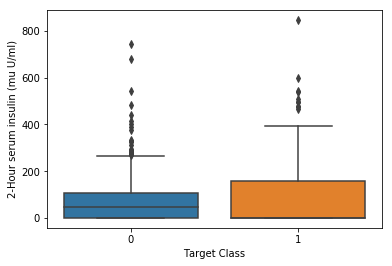

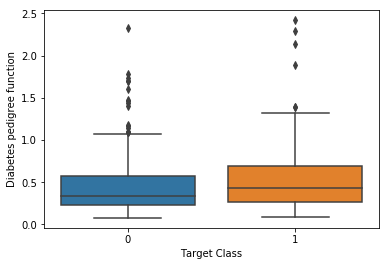

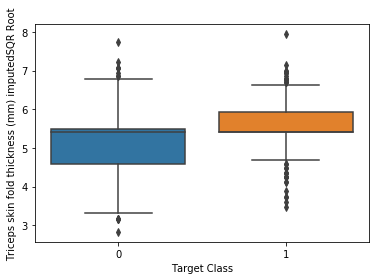

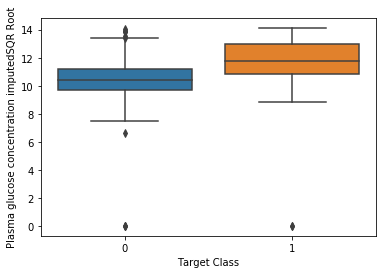

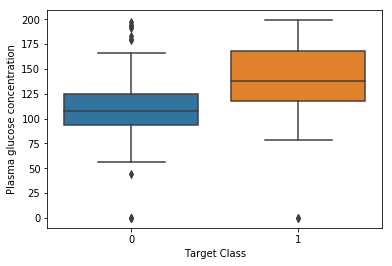

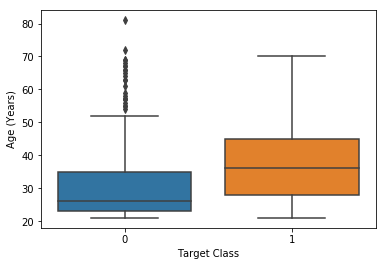

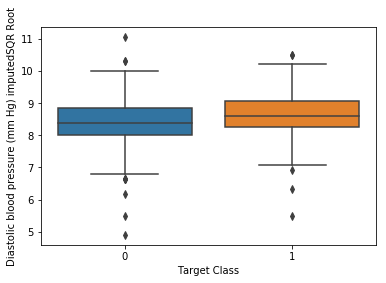

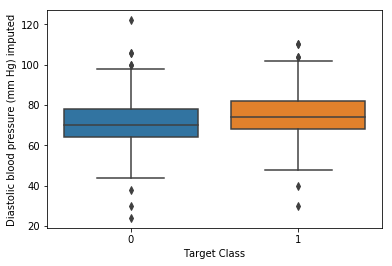

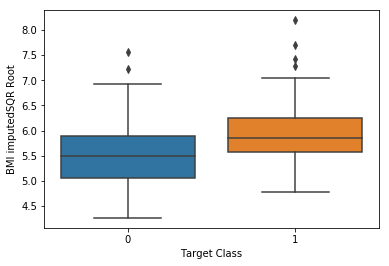

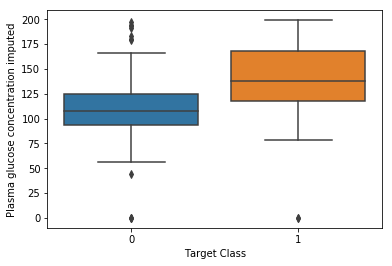

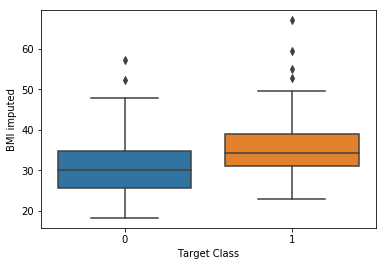

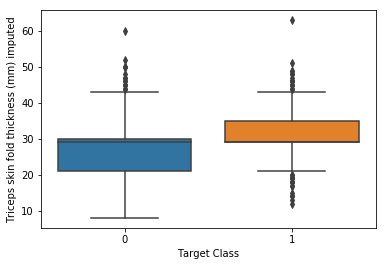

[None, None, None, None, None, None, None, None, None, None, None, None]

In [91]:
[outlier_analysis(train_data, fea) for fea in features[1:]]

In [92]:
set(diabetes_data.columns).difference(set(train_data.columns))

{'BMI', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)'}

In [93]:
set(diabetes_data.columns).difference(set(test_data.columns))

{'BMI', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)'}

In [94]:
feature_matrix_train, target_train = get_numpy_data(train_data,\
                                                    features,'Target Class')

In [95]:
feature_matrix_test, target_test = get_numpy_data(test_data,\
                                      features,\
                                       'Target Class')

In [96]:
feature_matrix_train.shape

(614, 14)

In [97]:
feature_matrix_test.shape

(154, 14)

In [99]:

if('Constant' not in features):
    features = ['Constant'] + features
features

['Constant',
 'Number of times pregnant',
 '2-Hour serum insulin (mu U/ml)',
 'Diabetes pedigree function',
 'Triceps skin fold thickness (mm) imputedSQR Root',
 'Plasma glucose concentration imputedSQR Root',
 'Plasma glucose concentration',
 'Age (Years)',
 'Diastolic blood pressure (mm Hg) imputedSQR Root',
 'Diastolic blood pressure (mm Hg) imputed',
 'BMI imputedSQR Root',
 'Plasma glucose concentration imputed',
 'BMI imputed',
 'Triceps skin fold thickness (mm) imputed']

In [100]:
len(features)

14

In [101]:
#Adding the weight for the constant feature
initial_coefficients = np.zeros(len(features))
initial_coefficients

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [102]:
feature_matrix_train[0, :]

array([ 1.        ,  2.        ,  0.        ,  0.304     ,  5.39939067,
        9.16515139, 84.        , 21.        ,  8.50912358, 72.40518417,
        5.69714522, 84.        , 32.45746367, 29.15341959])

In [133]:
##Default threshold for convergence = 1e20
#Default iterations = 10
coefficients_10, derivatives_10 = logistic_regression(initial_coefficients,\
                                                     feature_matrix_train,\
                                                     target_train, features,\
                                                     step_size = 0.1)

#coefficients_10, derivatives_10 = logistic_regression(initial_coefficients[3:8],\
#                                                      feature_matrix_train[:, [3:8]],\
#                                                      target_train,\
#                                                      features[3:8],\
#                                                      step_size = 0.1)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [134]:
#Default threshold for convergence = 1e20
coefficients_100, derivatives_100 = logistic_regression(initial_coefficients,\
                                                        feature_matrix_train,\
                                                        target_train,\
                                                        features,\
                                                        max_iter = 100, step_size = 0.1)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [135]:
#Default threshold for convergence = 1e20
coefficients_1000, derivatives_1000 = logistic_regression(initial_coefficients,\
                                                          feature_matrix_train,\
                                                          target_train, features,\
                                                          max_iter = 1000, step_size = 0.1)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [136]:
coefficients_100.head()

,Constant,Number of times pregnant,2-Hour serum insulin (mu U/ml),Diabetes pedigree function,Triceps skin fold thickness (mm) imputedSQR Root,Plasma glucose concentration imputedSQR Root,Plasma glucose concentration,Age (Years),Diastolic blood pressure (mm Hg) imputedSQR Root,Diastolic blood pressure (mm Hg) imputed,BMI imputedSQR Root,Plasma glucose concentration imputed,BMI imputed,Triceps skin fold thickness (mm) imputed
0,-6131.748692,-8717.850733,416.449713,-1118.164162,-19396.668631,-60199.927381,-493015.337095,6045.777266,4713.459665,8546.049661,22201.098515,496963.785037,-18203.418592,-3968.222304
0,-6138.348692,-8727.650733,-241.850287,-1116.342262,-19387.523441,-60193.310710,-492803.337095,5901.277266,4686.691318,8278.490180,22209.135790,497135.085037,-18139.394338,-3916.659827
0,-6141.448692,-8725.350733,408.049713,-1119.849262,-19429.843020,-60298.548524,-493886.037095,6064.877266,4724.777202,8573.414327,22240.175176,497817.085037,-18208.430085,-3968.974614
0,-6148.048692,-8735.150733,-250.250287,-1118.013562,-19420.337275,-60290.878147,-493648.737095,5922.477266,4693.717148,8277.054845,22248.202962,497979.385037,-18136.715831,-3912.912137
0,-6151.148692,-8732.850733,399.649713,-1121.330862,-19461.015864,-60393.914346,-494673.537095,6048.977266,4726.431696,8523.778993,22279.242348,498648.985037,-18202.091578,-3965.226925


In [137]:
derivatives_100.head()

,Constant,Number of times pregnant,2-Hour serum insulin (mu U/ml),Diabetes pedigree function,Triceps skin fold thickness (mm) imputedSQR Root,Plasma glucose concentration imputedSQR Root,Plasma glucose concentration,Age (Years),Diastolic blood pressure (mm Hg) imputedSQR Root,Diastolic blood pressure (mm Hg) imputed,BMI imputedSQR Root,Plasma glucose concentration imputed,BMI imputed,Triceps skin fold thickness (mm) imputed
0,-31.0,22.0,6268.0,-33.170,-407.300888,-1028.045390,-10365.0,1392.0,344.465605,2617.241473,316.301482,6910.0,-723.457464,-566.147874
0,-66.0,-98.0,-6583.0,18.219,91.451899,66.166715,2120.0,-1445.0,-267.683478,-2675.594816,80.372754,1713.0,640.242536,515.624769
0,-31.0,23.0,6499.0,-35.070,-423.195790,-1052.378141,-10827.0,1636.0,380.858839,2949.241473,310.393860,6820.0,-690.357464,-523.147874
0,-66.0,-98.0,-6583.0,18.357,95.057450,76.703771,2373.0,-1424.0,-310.600536,-2963.594816,80.277856,1623.0,717.142536,560.624769
0,-31.0,23.0,6499.0,-33.173,-406.785889,-1030.361997,-10248.0,1265.0,327.145482,2467.241473,310.393860,6696.0,-653.757464,-523.147874


### Plot the derivative for the variables

In [138]:
#For 10 iterations
def plotting_util(data):
    for feature in data.columns.tolist():
#Parameters
# plot_type, , feature, data, x, y
        plotting(None, feature, None, list(range(1, data.shape[0] + 1)),\
             data[feature].tolist())

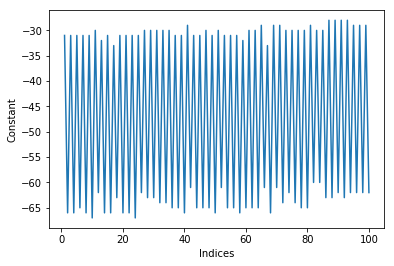

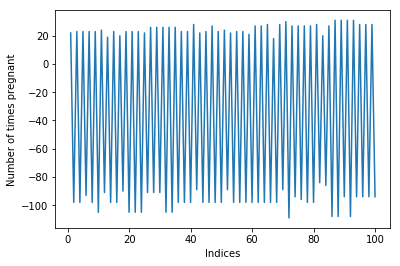

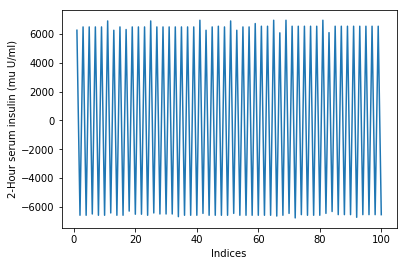

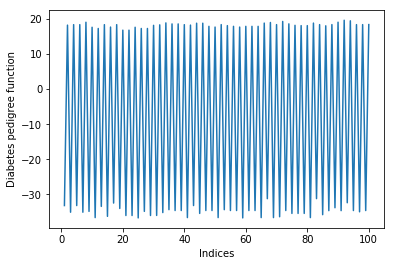

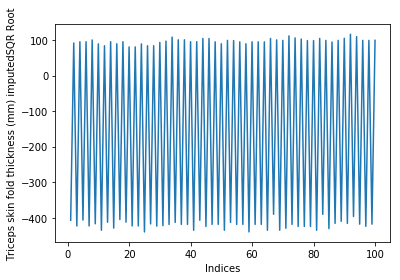

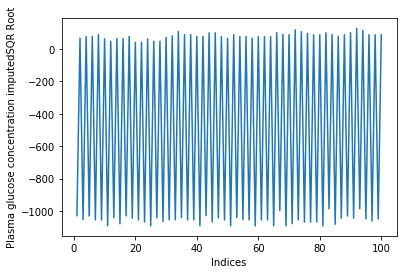

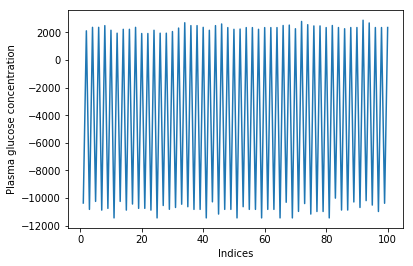

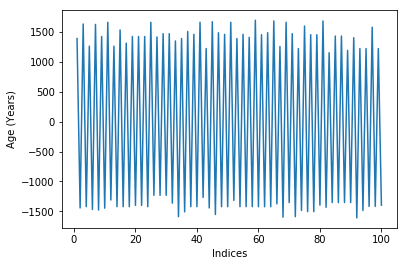

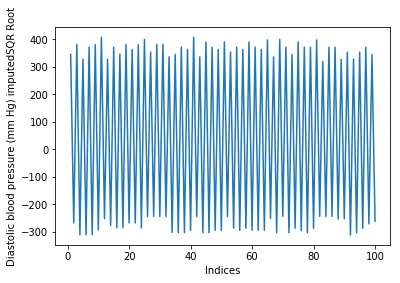

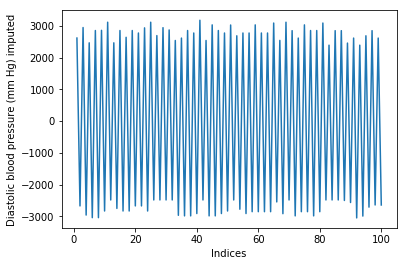

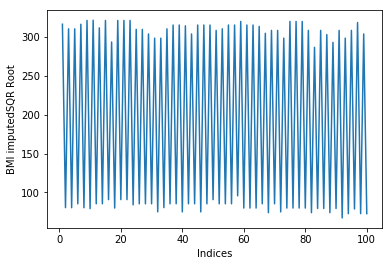

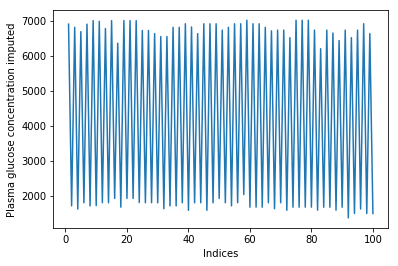

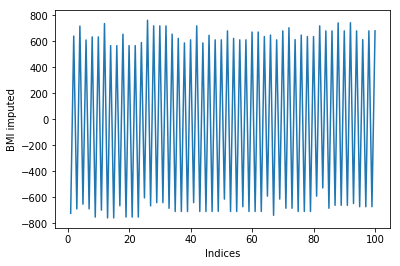

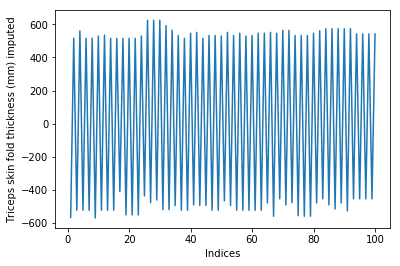

In [139]:
plotting_util(derivatives_100)

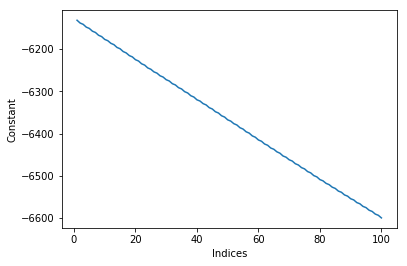

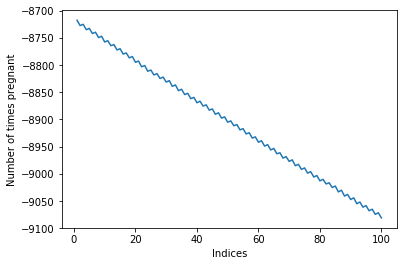

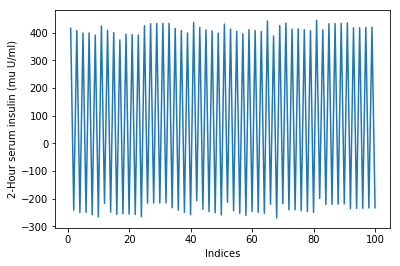

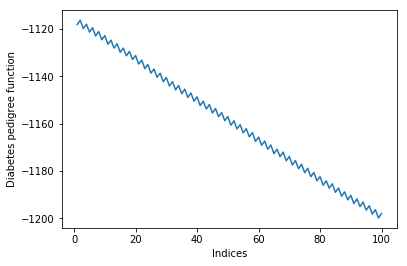

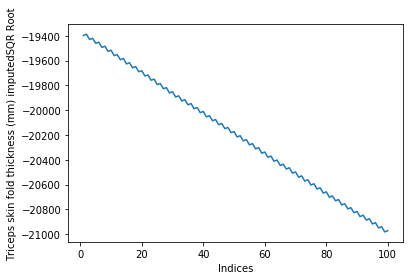

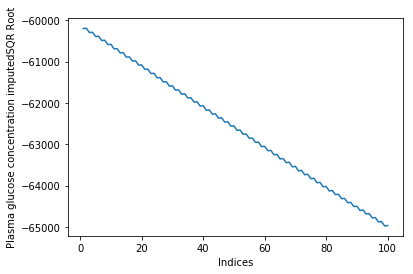

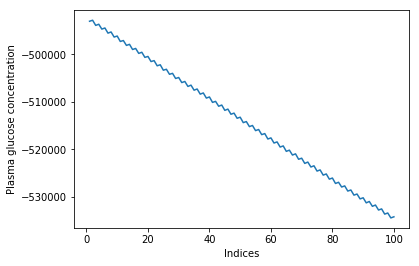

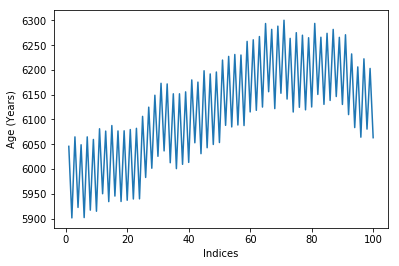

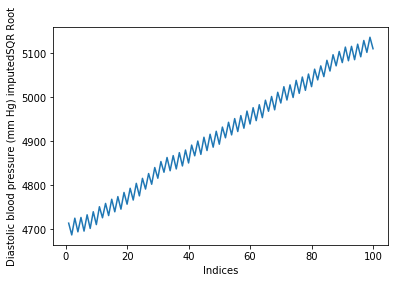

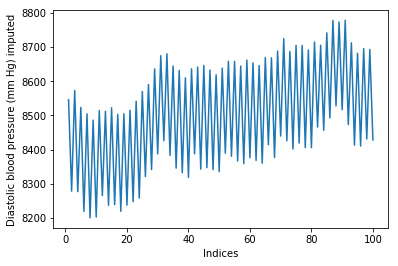

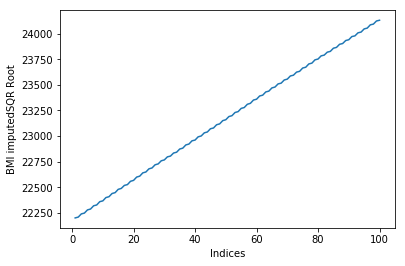

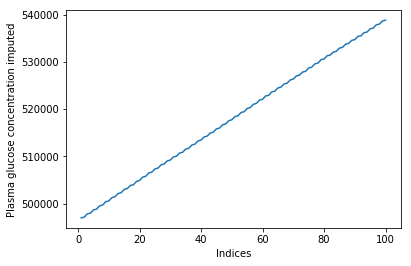

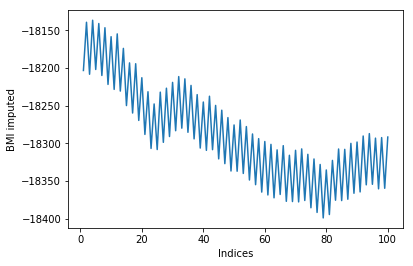

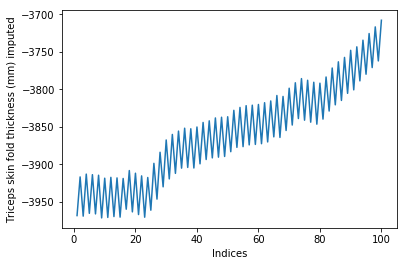

In [140]:
##Plotting the coefficients obtained after 10 iterations
plotting_util(coefficients_100)

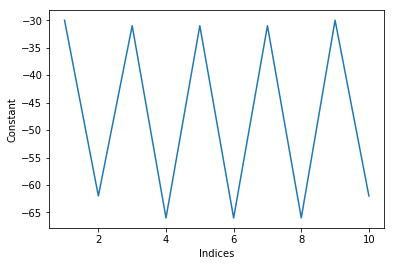

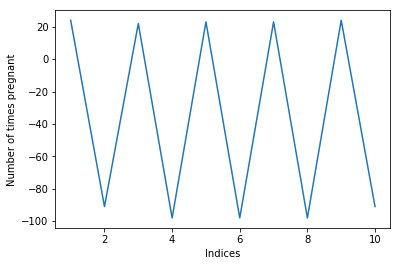

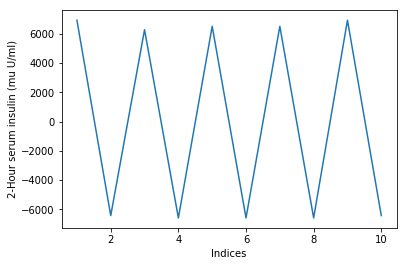

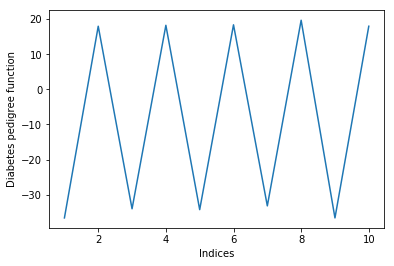

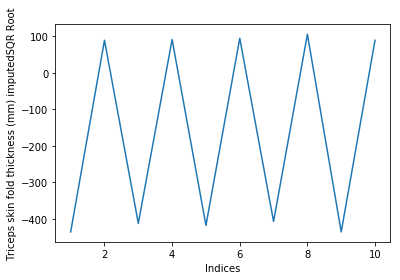

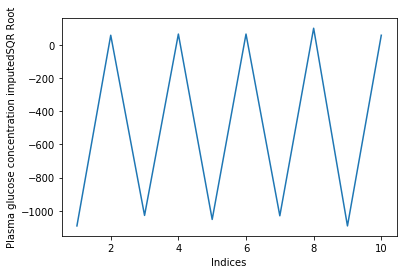

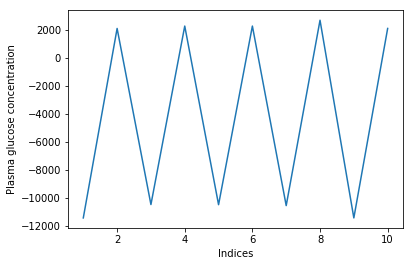

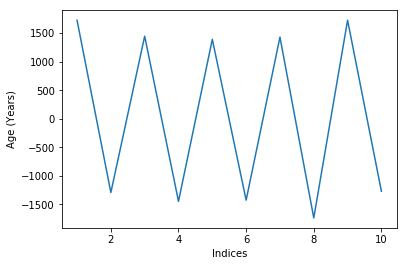

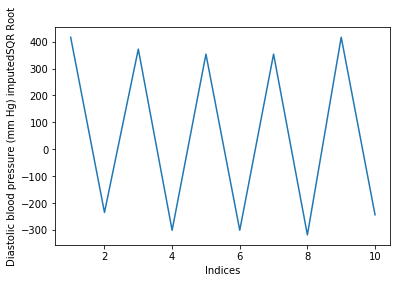

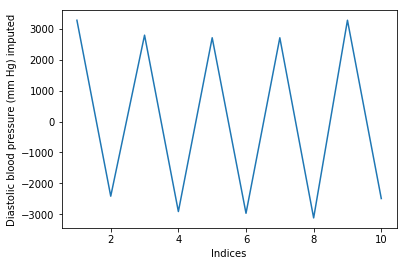

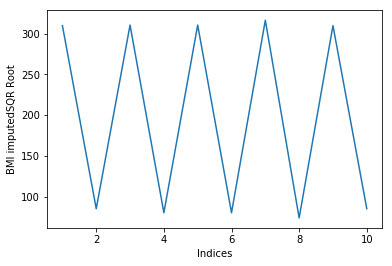

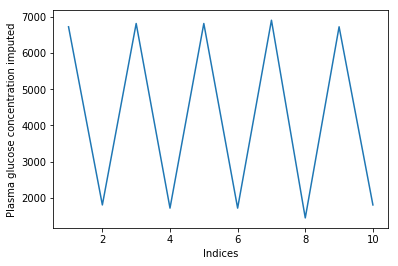

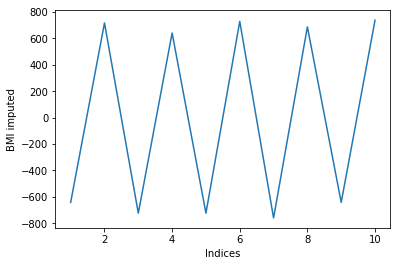

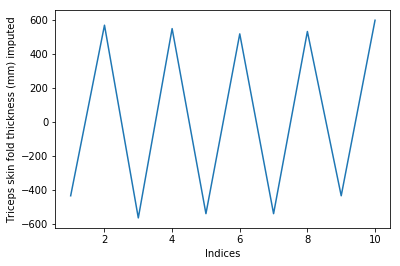

In [141]:
plotting_util(derivatives_10)

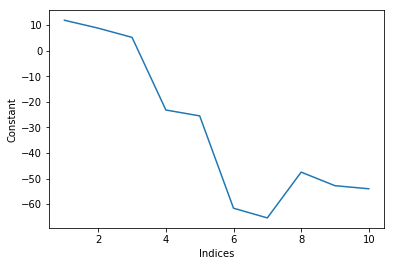

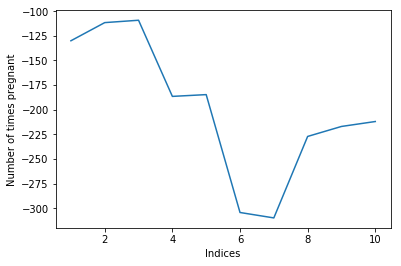

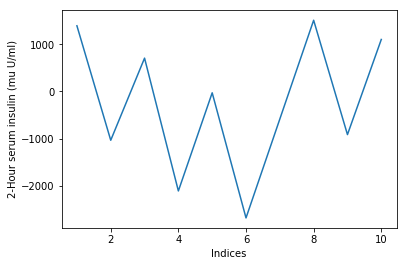

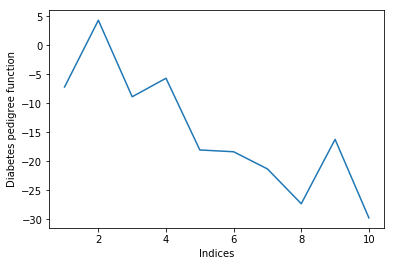

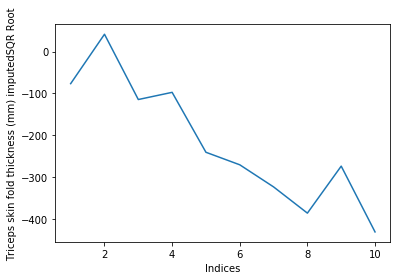

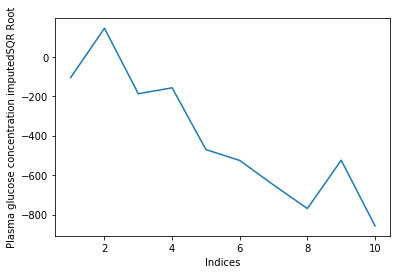

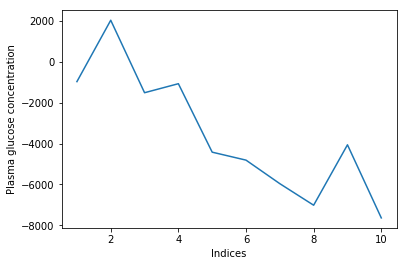

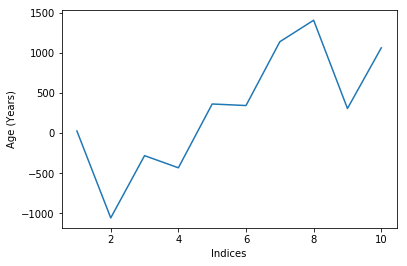

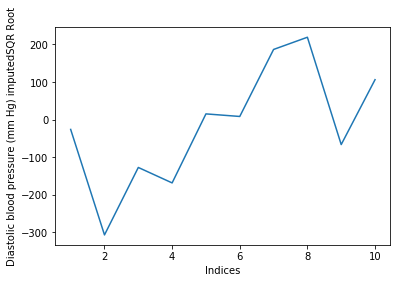

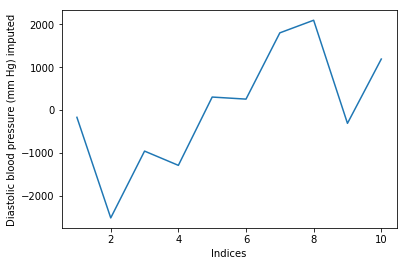

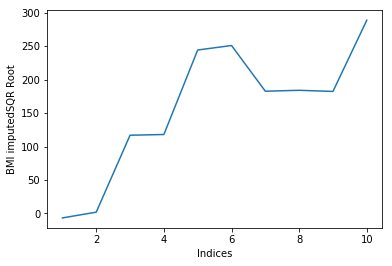

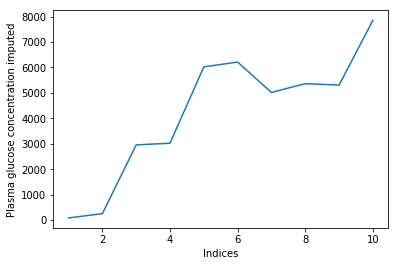

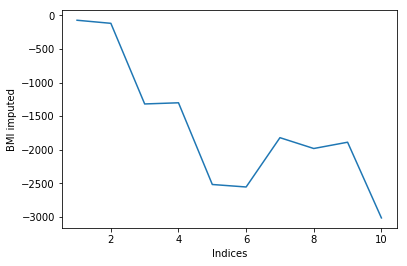

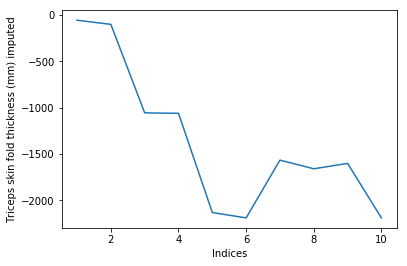

In [118]:
##Plotting the coefficients obtained after 10 iterations
plotting_util(coefficients_10)

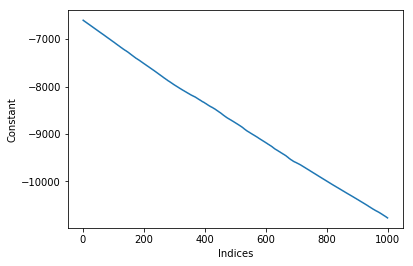

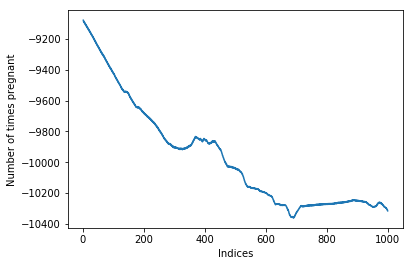

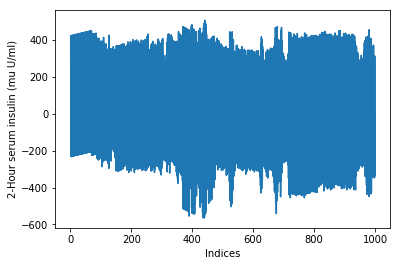

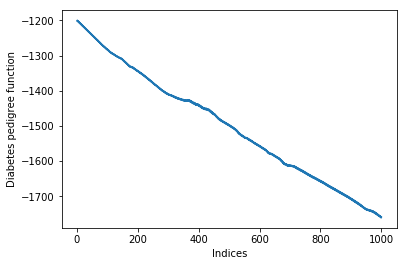

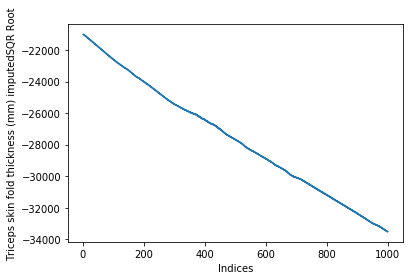

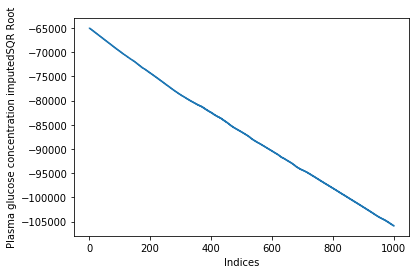

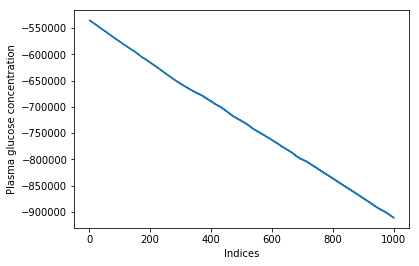

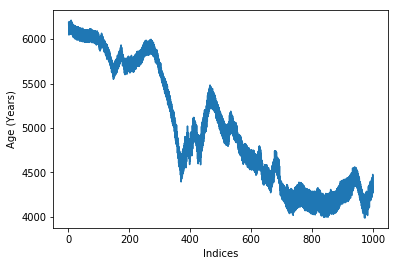

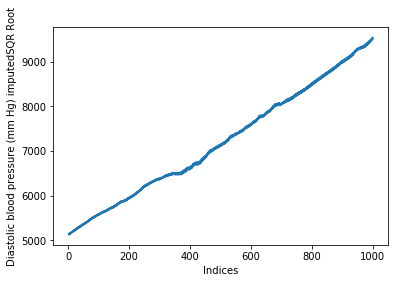

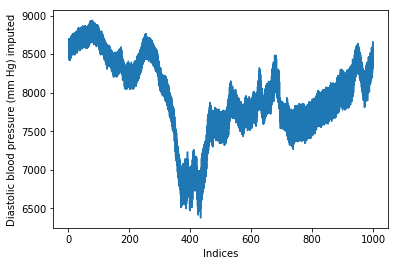

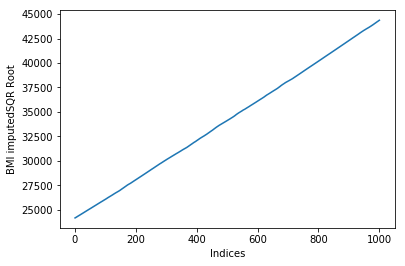

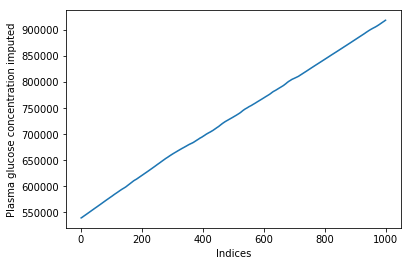

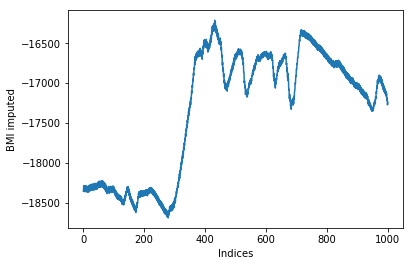

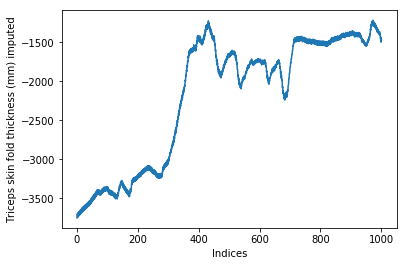

In [142]:
plotting_util(coefficients_1000)

In [143]:
#Obtain the prediction for the test set using the coefficients_100
#and derivative_100
learned_coefficients = coefficients_100.iloc[-1, :].tolist()
learned_coefficients

[-6599.748694190905,
 -9081.150660226622,
 -233.448237197072,
 -1197.9911917762884,
 -20972.32395490985,
 -64967.01109965381,
 -534254.1370826816,
 6063.263981573105,
 5110.383741027952,
 8428.295996636303,
 24130.481423850357,
 538824.884834721,
 -18291.83273753328,
 -3707.73102594317]

In [144]:
#Predictions for certain set of threshold values

def prediction_results(feature_matrix, coefficients):
    score = np.dot(feature_matrix, np.array(coefficients))
    
    predict_probability_test =  (1 + np.e**(score))**(-1)
    
    prediction_test = get_prediction_class(predict_probability_test, \
                                       np.array(len(predict_probability_test)*[0.5]))
    
    #Confusion Matrix
    CM = confusion_matrix(y_test, prediction_test)
    print("Confusion Matrix:-\n{}" .format(CM))
    
    #Positive class is 1 and negative is 0
    #Accuracy
    print("Accuracy:-\n%.2f" %(CM.diagonal().sum()/ CM.sum()))
    
    #Precision
    precision = CM[0, 0] / (CM[0, 0] + CM[1, 0])
    print("Precision:-\n%.2f" %(precision))
    
    #Recall
    recall = CM[1, 1]/ (CM[1, 1] + CM[0, 1])
    print("Recall:-\n%.2f" %(recall))
    
    #F-Measure ---> Harmonic Mean of Precision and Recall
    print("F-Measure:-\n%.2f" %((2 * precision * recall)/ (precision + recall)))

In [145]:
#Prediction Results with 10 iterations
prediction_results(feature_matrix_test, coefficients_10.iloc[-1, :])

Confusion Matrix:-
[[34 65]
 [24 31]]
Accuracy:-
0.42
Precision:-
0.59
Recall:-
0.32
F-Measure:-
0.42


/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [123]:
#help(confusion_matrix)

In [148]:
#Prediction Results with 100 iterations
prediction_results(feature_matrix_test, coefficients_100.iloc[-1, :])

Confusion Matrix:-
[[34 65]
 [23 32]]
Accuracy:-
0.43
Precision:-
0.60
Recall:-
0.33
F-Measure:-
0.42


/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [150]:
#Prediction Results with 1000 iterations
prediction_results(feature_matrix_test, coefficients_1000.iloc[-189, :])

Confusion Matrix:-
[[31 68]
 [25 30]]
Accuracy:-
0.40
Precision:-
0.55
Recall:-
0.31
F-Measure:-
0.39


/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


## Using only the Square Root Columns

These features have near to normal distribution

In [161]:
SQR_root_cols

['Triceps skin fold thickness (mm) imputedSQR Root',
 'Diastolic blood pressure (mm Hg) imputedSQR Root',
 'BMI imputedSQR Root',
 'Plasma glucose concentration imputedSQR Root']

In [163]:
help(get_numpy_data)

Help on function get_numpy_data in module __main__:

get_numpy_data(data, features, target=None)



In [200]:
feature_matrix_train_SQR, target_train = get_numpy_data(train_data,\
                                                    SQR_root_cols,\
                                                    'Target Class')

In [201]:
feature_matrix_test_SQR, target_test = get_numpy_data(test_data,\
                                                    SQR_root_cols,\
                                                    'Target Class')

In [207]:
if('Constant' not in SQR_root_cols):
    SQR_root_cols = ['Constant'] + SQR_root_cols

In [208]:
len(SQR_root_cols)

5

In [211]:
#Initialize the weights
initial_coefficients_SQR = np.zeros(len(SQR_root_cols))

In [212]:
len(initial_coefficients_SQR)

5

In [202]:
feature_matrix_train_SQR.shape

(614, 5)

In [213]:
coefficients_SQR_100, derivatives_SQR_100 = logistic_regression(initial_coefficients_SQR,\
                                                          feature_matrix_train_SQR,\
                                                          target_train, SQR_root_cols,\
                                                          max_iter = 100, step_size = 0.1)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


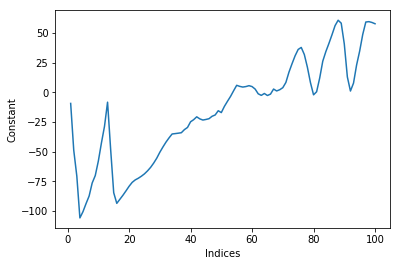

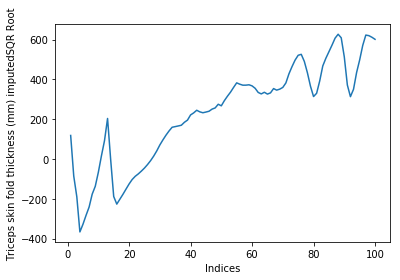

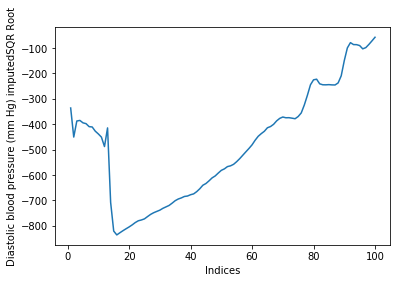

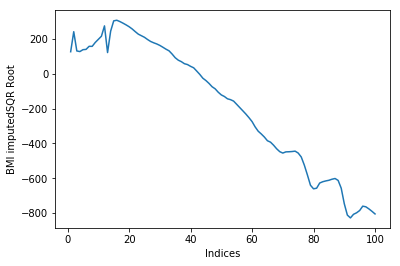

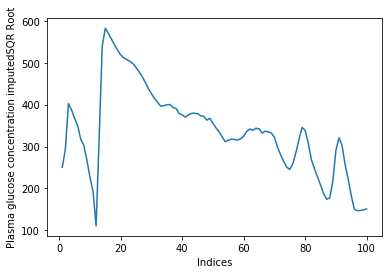

In [214]:
plotting_util(coefficients_SQR_100)

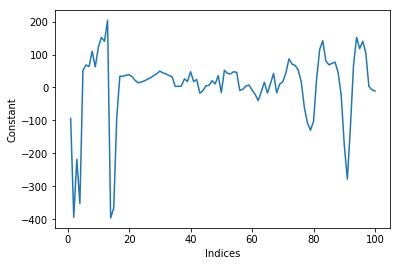

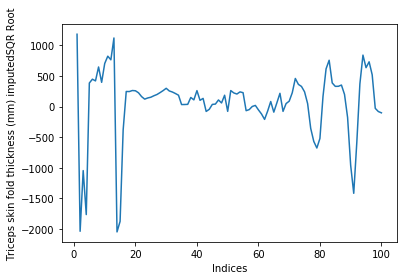

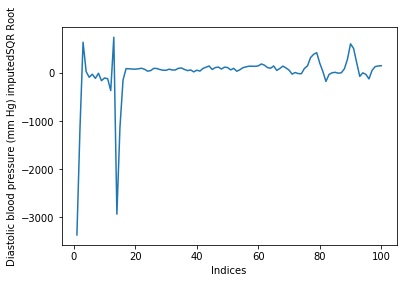

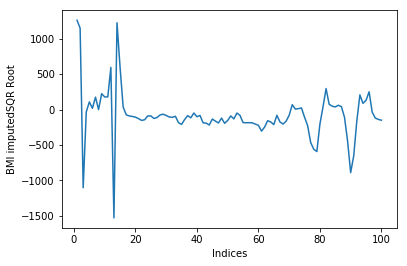

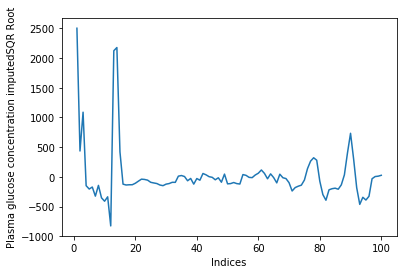

In [216]:
plotting_util(derivatives_SQR_100)

In [219]:
#Prediction Results with 100 iterations
for i in range(11):
    print("Coefficient No:- %d" %(i))
    prediction_results(feature_matrix_test_SQR, coefficients_SQR_100.iloc[i, :])

Coefficient No:- 0
Confusion Matrix:-
[[99  0]
 [55  0]]
Accuracy:-
0.64
Precision:-
0.64
Recall:-
nan
F-Measure:-
nan
Coefficient No:- 1
Confusion Matrix:-
[[57 42]
 [45 10]]
Accuracy:-
0.44
Precision:-
0.56
Recall:-
0.19
F-Measure:-
0.29
Coefficient No:- 2
Confusion Matrix:-
[[88 11]
 [54  1]]
Accuracy:-
0.58
Precision:-
0.62
Recall:-
0.08
F-Measure:-
0.15
Coefficient No:- 3
Confusion Matrix:-
[[13 86]
 [20 35]]
Accuracy:-
0.31
Precision:-
0.39
Recall:-
0.29
F-Measure:-
0.33
Coefficient No:- 4
Confusion Matrix:-
[[11 88]
 [18 37]]
Accuracy:-
0.31
Precision:-
0.38
Recall:-
0.30
F-Measure:-
0.33
Coefficient No:- 5
Confusion Matrix:-
[[10 89]
 [20 35]]
Accuracy:-
0.29
Precision:-
0.33
Recall:-
0.28
F-Measure:-
0.31
Coefficient No:- 6
Confusion Matrix:-
[[ 8 91]
 [13 42]]
Accuracy:-
0.32
Precision:-
0.38
Recall:-
0.32
F-Measure:-
0.35
Coefficient No:- 7
Confusion Matrix:-
[[14 85]
 [21 34]]
Accuracy:-
0.31
Precision:-
0.40
Recall:-
0.29
F-Measure:-
0.33
Coefficient No:- 8
Confusion Matri

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
